/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[2 1 2 2 0 1 1 1 2 1 1 2 1 2 2 1 0 0 1 2 0 2 0 1 1 1 2 2 1 2 1 1 2 2 1 2 2
 2 2 1 1 1 0 1 1 1 2 1 2 1 2 2 0 0 1 1 0 1 1 2 1 2 0 2 1 1 0 2 1 2]
[ True  True False False  True  True  True False  True False False  True
  True False  True False False  True False False  True  True False  True
  True  True  True  True  True False  True False  True  True  True False
  True  True  True False  True  True False  True False  True False  True
  True  True False  True False  True  True  True  True False  True  True
 False  True False False False  True  True  True False False]
[0 1 0 0 1 2 1 2 2]
[ True  True  True  True  True  True  True  True  True]
Model accuracy: 1.000


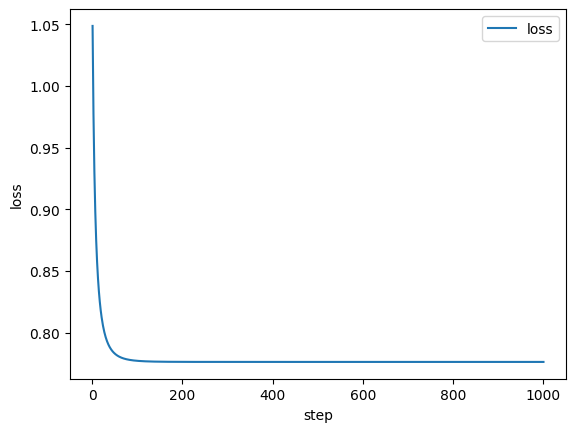

In [6]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
onehot_encoder = OneHotEncoder(sparse=False)
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

# Split sizes
train_size = 0.70
val_size = 0.15
test_size = 0.3
X,Y=make_classification(n_samples=100, n_features=5, n_informative=3 , n_classes=3)

# Split (train)
X, X_, Y, y_ = train_test_split(X, Y, train_size=train_size, stratify=Y)

# Split (test)
X_val, X_test, y_val, Y_test = train_test_split(X_, y_, train_size=0.7, stratify=y_)

def loss(X, Y, W):

    Z = - X @ W
    N = X.shape[0]
    loss = 1/N * (np.trace(X @ W @ Y.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
    return loss

def gradient(X, Y, W, mu):

    Z = - X @ W
    P = softmax(Z, axis=1)
    N = X.shape[0]
    gd = 1/N * (X.T @ (Y - P)) + 2 * mu * W
    return gd

def gradient_descent(X, Y, max_iter=1000, eta=0.1, mu=0.01):

    Y_onehot = onehot_encoder.fit_transform(Y.reshape(-1,1))
    global W
    W = np.zeros((X.shape[1], Y_onehot.shape[1]))
    step = 0
    step_lst = []
    loss_lst = []
    W_lst = []

    while step < max_iter:
        step += 1
        W -= eta * gradient(X, Y_onehot, W, mu)
        step_lst.append(step)
        W_lst.append(W)
        loss_lst.append(loss(X, Y_onehot, W))

    df = pd.DataFrame({
        'step': step_lst,
        'loss': loss_lst
    })
    return df, W

class Multiclass:
    def fit(self, X, Y):
        self.loss_steps, self.W = gradient_descent(X, Y)

    def loss_plot(self):
        return self.loss_steps.plot(
            x='step',
            y='loss',
            xlabel='step',
            ylabel='loss'
        )

    def predict(self, H):
        Z = - H @ self.W
        P = softmax(Z, axis=1)
        return (np.argmax(P, axis=1))


# fit model
model = Multiclass()
model.fit(X, Y)

# plot loss, prediction and comparison with actual value
model.loss_plot()

print(model.predict(X))

print(model.predict(X) == Y)

#-----------------------------------------------------------------testing the model------------------------------------------------------------------------

#test set
model = Multiclass()
model.fit(X_test, Y_test)

# plot loss, prediction and comparison with actual value

Z_p = - X_test @ W
P= softmax(Z_p, axis=1)
Y_pred=np.argmax(P, axis=1)
print(Y_pred)

print(Y_pred == Y_test)
print('Model accuracy: {:.3f}'.format(balanced_accuracy_score(Y_test,Y_pred)))
